<a href="https://colab.research.google.com/github/kirankumar-p/python-aiml/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** 1. Read the Data set**


In [2]:
import numpy as np
import pandas as pd

import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Suppress scientific notation in numpy outputs
np.set_printoptions(suppress=True)

In [5]:
from google.colab import drive
drive.mount('/gdrive', force_remount = True)
%cd /gdrive/'MyDrive/collab'
imagefile = 'images.npy'
labelsFile='Labels.csv'

X = np.load(imagefile)
Y=pd.read_csv(labelsFile)

Mounted at /gdrive
/gdrive/MyDrive/collab


In [6]:
X.shape

(4750, 128, 128, 3)

In [7]:
Y.shape

(4750, 1)

In [8]:
Y.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


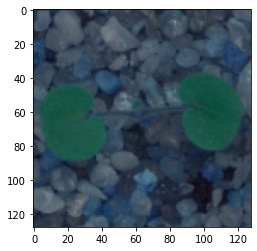

In [9]:
plt.imshow(X[0])

Question 2

In [10]:
X = X.astype('float32') / 255.0

In [11]:
print(len(X)) # Check the number of rows in the dataset.
print(X.shape) # The shape of dataset tells us that there are 10008 numbers, each of which has 784 pixels. (It's the shape of the numpy array)

4750
(4750, 128, 128, 3)


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.75, random_state=0)


In [13]:
type(X_train) # As we can see that the data to be fed into model is of the type numpy array.


numpy.ndarray

(4750, 128, 128)


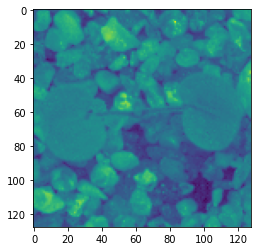

In [14]:
from skimage import io, color

lina_gray = color.rgb2gray(X)
print(lina_gray.shape)



plt.imshow(lina_gray[0])

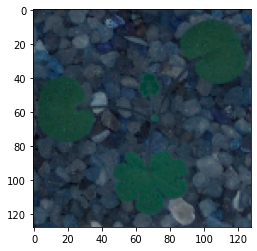

In [15]:
i=1
img = X[i]
plt.imshow(img, cmap='gray')

Guasian Blurring

In [16]:
new_x = np.empty((4750, 128, 128)) 

In [17]:
X[0].shape

(128, 128, 3)

In [18]:
import cv2

for idx, img in enumerate(lina_gray):
  new_x[idx] = cv2.GaussianBlur(img, (5, 5), 0)

Gray scale image which is guassian blurred

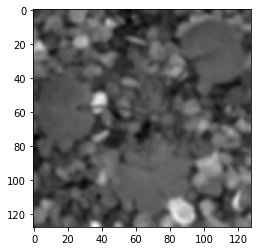

In [19]:
plt.imshow(new_x[1], cmap='gray')


In [20]:
# img = cv2.read(X)

# blur = cv2.blur(img,(5,5))

# plt.subplot(121),plt.imshow(img),plt.title('Original')
# plt.xticks([]), plt.yticks([])
# plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
# plt.xticks([]), plt.yticks([])
# plt.show()

new_x_1 = np.empty((4750, 128, 128,3)) 
import cv2

for idx, img in enumerate(X):
  new_x_1[idx] = cv2.GaussianBlur(img, (7, 7), 0)

Actual image

AxesImage(54,36;334.8x217.44)


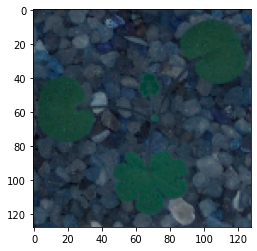

In [21]:
i=1
img = X[i]
print(plt.imshow(img, cmap='gray'))

Color image which is guassian blurred 

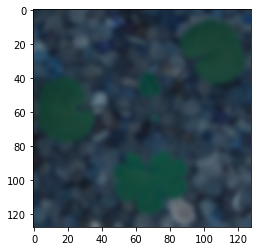

In [22]:
plt.imshow(new_x_1[1], cmap='gray')

Question 3

In [23]:
import pandas as pd
#y = [[0], [1], [2], [3]]
#keras.utils.to_categorical(y)
#ohe = OneHotEncoder()
#ohe.fit_transform(y).toarray()
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
Y_NEW= ohe.fit_transform(Y).toarray()
Y_NEW.shape

(4750, 12)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y_NEW, test_size=0.3, random_state=0)

In [25]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(3325, 128, 128, 3)
(3325, 12)
(1425, 128, 128, 3)
(1425, 12)


In [26]:
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

In [27]:
print(X_test.shape)
print(y_test.shape)
print(X_validation.shape)
print(y_validation.shape)

(712, 128, 128, 3)
(712, 12)
(713, 128, 128, 3)
(713, 12)


Question 4 

In [28]:
from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from google.colab.patches import cv2_imshow

batch_size = None

model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=X_train.shape[1:]))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))


model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(12, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0

In [29]:
# initiate Adam 
from tensorflow.keras import datasets, models, layers, optimizers

opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)


In [30]:
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [31]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0

In [32]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=12)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('cifar_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

Epoch 1/25
52/52 [==============================] - 179s 3s/step - loss: 6.2684 - accuracy: 0.1223 - val_loss: 2.5136 - val_accuracy: 0.0534

Epoch 00001: val_loss improved from inf to 2.51363, saving model to cifar_cnn_checkpoint_01_loss2.5136.h5
Epoch 2/25
52/52 [==============================] - 179s 3s/step - loss: 2.1008 - accuracy: 0.3006 - val_loss: 2.4752 - val_accuracy: 0.1348

Epoch 00002: val_loss improved from 2.51363 to 2.47516, saving model to cifar_cnn_checkpoint_02_loss2.4752.h5
Epoch 3/25
52/52 [==============================] - 178s 3s/step - loss: 1.7301 - accuracy: 0.4017 - val_loss: 2.5241 - val_accuracy: 0.1348

Epoch 00003: val_loss did not improve from 2.47516
Epoch 4/25
52/52 [==============================] - 178s 3s/step - loss: 1.4881 - accuracy: 0.4728 - val_loss: 2.8342 - val_accuracy: 0.1348

Epoch 00004: val_loss did not improve from 2.47516
Epoch 5/25
52/52 [==============================] - 178s 3s/step - loss: 1.3660 - accuracy: 0.5255 - val_loss: 3.0

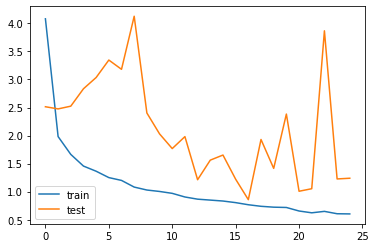

In [33]:
batch_size = 64
num_classes = 12
epochs = 25
num_predictions = 10

history = model.fit(X_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_test, y_test),
                    shuffle=True,
                    verbose=1,
                    callbacks=[early_stopping,model_checkpoint])

# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [34]:
# Score trained model.
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

23/23 [==============================] - 8s 356ms/step - loss: 1.2393 - accuracy: 0.5548
Test loss: 1.2393064498901367
Test accuracy: 0.5547752976417542


In [35]:
# Score trained model.
scores = model.evaluate(X_validation, y_validation, verbose=1)
print('Validation loss:', scores[0])
print('Validation accuracy:', scores[1])

23/23 [==============================] - 8s 356ms/step - loss: 1.3978 - accuracy: 0.5091
Validation loss: 1.3978023529052734
Validation accuracy: 0.5091164112091064


In [38]:
from sklearn.metrics import confusion_matrix


Y_pred = model.predict(X_validation)

#Return the column position where the max value is
Y_pred_classes = np.argmax(Y_pred,axis = 1)


Y_true = np.argmax(y_validation,axis = 1)
print("=== Confusion Matrix ===")
cm = confusion_matrix(Y_true, Y_pred_classes)
print(cm)

# confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# eval_m.plot_confusion_matrix(confusion_mtx, classes = species)
# eval_m.plot_loss_acc_curves(history)
# eval_m.Clf_report(model,Y_true,Y_pred_classes)

=== Confusion Matrix ===
[[18  0  0  0  0 12 13  0  0  0  0  0]
 [ 0  8  8  0  0 24  0  2  0  1 14  2]
 [ 0  0  4  0  0 36  0  0  0  0  0  0]
 [ 0  0  0 86  0  2  1  0  0  0  3  0]
 [ 2  0  0  0 22 12  0  0  0  0  0  0]
 [ 0  0  0  1  0 60  0  0  0  0  1  0]
 [16  0  0  1  0 14 58  0  0  0  0  1]
 [ 0  0  1  1  2 12  0 20  0  0  1  1]
 [ 0  0  0  7  0 47  9  0  0  4 11  5]
 [ 0  0  0  7  0  5  0  0  0  6  6  0]
 [ 0  0  0  1  0 23  0  0  0  0 60  0]
 [ 0  0  0  0  0 38  0  1  0  0  2 21]]


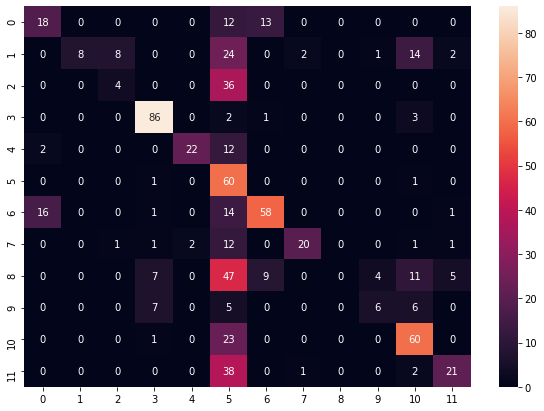

In [39]:
import seaborn as sns

df_cm = pd.DataFrame(cm, index = [i for i in range(0,12)],
                     columns = [i for i in range(0,12)])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='d')